**WD22 Formative 1.** Author: Bernie Hogan. V2.1

# Interpreting Social Networks: Formative 1. 

This is the first of four TA-graded formative exercises. In this formative you will be expected to draw and annotate several kinds of social networks, including a real one that I have prepared for you. 

These will be graded by the TA. The mark does not count towards your grade and is simply advisory to signal some things to work on. Some of these things will be obvious from the example answers, others the TA might raise in the comments. 

Please submit this file but save it so that instead of `SURNAME_INIT_` it is your name. So for me this sheet would be saved as `Hogan_B ISN22_f1_NetworkxPractice.ipynb`. Submission is done through Canvas. It is due **Thursday, February 3rd at 12pm**. 

# Question 1. Explore a network without visualising it. 

For the first question, I will ask you to read in a network file into `networkx` and then to describe some features of that network. The network is the classic 'divided they blog' network of political blogs in America in the 2004 election. There has been much talk of America being a polarised country possible due to social media, but yet, this polarisation was observed quite starkly among blogs prior to the advent of Facebook and Twitter. Ironically, Lada Adamic, one of the authors of this paper went on to become a key data scientist at Facebook and wrote about polarisation in the company with Facebook data ten years later.

Networkx's native visualisation routines do not do a good job showing the network, but you can see it in the [paper here](https://dl.acm.org/doi/abs/10.1145/1134271.1134277). The goal of this exercise is to explore the data _without_ this iconic visualisation. 

## Question 1a. Read in a network file. 

To get you started, check that your network file looks similar to the one here from this code. For the example answer I stored the file in an adjacent folder called `data`, so for me that is why the path looks like so. I similarly recommend you having a separate folder for your data just in a sibling folder to this one (rather than a 'sub folder' within this one). As in: 

~~~
- Interpreting Social Networks
  - Data
    - polblogs_directed.graphml
    - ...
  - Formatives
    - SURNAME_INIT ISN22_f1_NetworkxPractice.ipynb
  - Summative 
  - Readings
  etc...
~~~

In [1]:
import numpy as np

In [2]:
# This command will change the style of the figure so it is more sharp
%config InlineBackend.figure_format = 'svg'

from pathlib import Path
import networkx as nx 

In [3]:
network_data = Path().cwd().parent / "data"
blogg = nx.read_graphml(network_data / "polblogs_directed.graphml")

print(nx.info(blogg))

DiGraph with 1490 nodes and 19025 edges


## Question 1b. A Describe a network.

For now, let's ask some simple descriptive questions: 
- How many nodes?
- How many nodes are of `'value'` `'0'` (which means Republican) and how many are of `'value'` `'1'` (which means Democrat)?

In [4]:
rd_nodes= list(nx.get_node_attributes(blogg, 'value').values())

In [5]:
num_nodes = len(blogg.nodes) # 1pt
num_nodes_dem = rd_nodes.count("1") # 1pt
num_nodes_rep = rd_nodes.count("0") # 1pt

print(f"In the Divided they Blog data set there were {num_nodes} nodes. In the network, {num_nodes_dem} were labelled Democrat whereas {num_nodes_rep} were labelled Republican.\n")

In the Divided they Blog data set there were 1490 nodes. In the network, 732 were labelled Democrat whereas 758 were labelled Republican.



## Question 1c. Summarise the network 

We do not have many ways of summarising the network yet. Below I would like you to report the average in-degree among the democrat subgraph and then the average in-degree among the republication subgraph. 

This will require you to first get a subgraph. As seen in the notes when we coloured the components differently, `nx.subgraph(g, nbunch)` is how you get a subgraph. The `nbunch` in this case is a list of nodes with either `'value' == '0'` or `'value' == '1'`. 

I did not show average in-degree in class but it works the same as degree. There is no networkx method (so far as I know) for average in-degree. However, it is printed when you type `nx.info()`. You can just do that and report the value in a pinch, but I would much prefer if you calculate it yourself instead by getting the average of the values from `<subgraph>.in_degree()`. 

In [6]:
values= nx.get_node_attributes(blogg, 'value')

In [7]:
d_sub=[]
r_sub=[]
for k,v in values.items():
    if v=="0":
        r_sub.append(k)
    else:
        d_sub.append(k)    

In [8]:
dem_sub= nx.subgraph(blogg,d_sub)
rep_sub= nx.subgraph(blogg,r_sub)

In [9]:
d_in_degree=0
for i,j in list(dem_sub.edges):
    if (i in list(dem_sub.nodes)) & (j in list(dem_sub.nodes)):
        d_in_degree+=1
#check: sum(list(dict(dem_sub.in_degree).values())) 

r_in_degree=0
for i,j in list(rep_sub.edges):
    if (i in list(rep_sub.nodes)) & (j in list(rep_sub.nodes)):
        r_in_degree+=1
#check: sum(list(dict(rep_sub.in_degree).values()))          

In [10]:
avg_degree_dem = d_in_degree/len(dem_sub.nodes) # ...
#check: np.mean(list(dict(dem_sub.in_degree).values()))
avg_degree_rep = r_in_degree/len(rep_sub.nodes) # ...
#check: np.mean(list(dict(rep_sub.in_degree).values()))
print(f"The average degree among the Democrats was {avg_degree_dem:0.2f}, whereas it was {avg_degree_rep:0.2f} among the Republicans.")

The average degree among the Democrats was 12.23, whereas it was 11.06 among the Republicans.


In [11]:
# Marker's comments on question 1. 

...

q1 = ... # Out of 10. (to load + num_nodes + num_dem + 
#                      num_rep + avg_degree_dem + avg_degree_rep)

# Question 2. Visualise a network

A now classic network is the Zackary Karate club network. This graph is based on anthropological work where one club split and followed one teacher and the remainder stayed in the original club. This network is available in the standard networkx package.

Visualise this network in such a way that you indicate the two clubs and use a spring layout. Notice that the clubs are represented by the attribute `'club'` which takes the values `'Mr. Hi'` and `'Officer'`.   

In [12]:
import matplotlib.pyplot as plt

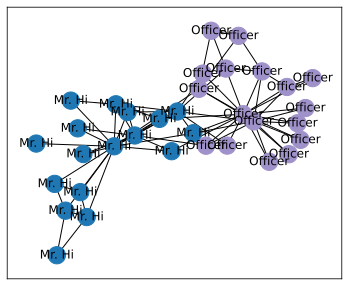

In [26]:
G = nx.karate_club_graph()
attributes= [list(G.nodes[n].values())[0] for n in G.nodes]
labels=dict(enumerate(attributes))
colors = ['#1f78b4' if (n=='Mr. Hi') else '#9f91c9' for n in attributes]
plt.figure(1,figsize=(6,5))
nx.draw_networkx(G, pos=nx.spring_layout(G),node_color=colors,labels=labels)

In [ ]:
# Marker's comments on question 2. 

...

q2 = ... # Out of 4 (load, right layout, different colours, clear code) 

# Question 3. Make a connect-the-dots game

Connect-the-dots games are featured in many children's books. You start at 0 and draw a line to dot number 1 then dot number 2. When you get to the end you draw a line from the last node back to 0. Then you should have an identifiable figure. 

In graph terms, a connect the dots would be an example of a [Hamiltonian Path](https://en.wikipedia.org/wiki/Hamiltonian_path), which is a path that includes every node only once and is a circuit. 

Below I have a function called `make_connect_the_dots(g, pos, print_path)`. Please run that cell. Then below that create a graph with $n$ nodes and a dictionary of positions. This would look something like: 

~~~ python 
pos = {0:(-.2,.6),
       1:(.4,.4),
       ...}
~~~

By running the `make_connect_the_dots()` function, you will then show the nodes with their positions and numbers on the left and then the nodes connected but with no lines on the right. If you give the function a path such as `"connect_the_dots.pdf"`, it will save the version with the numbers and no lines to that file. Please use this file name to 'name' your figure, such as `"star.pdf"`.

In [16]:
import matplotlib.pyplot as plt 
import networkx as nx 

def make_connect_the_dots(g , pos, print_path=False):
    '''Makes a connect the dots below, with the left side showing the number and the right side showing the the connected dots. 
    
    requires: 
    g: a networkx Graph object
    pos: a dictionary of node positions. 
    print_path (default=False): a path to save only the figure without the
                                the connecting lines so you can print and 
                                draw.
    '''
    
    if (g == ...) or (pos ==...):
        print("Please run this again with a Graph object and a dictionary of positions.")
        return
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    
    nx.draw_networkx_nodes(g,pos,
                           node_size=5,
                           ax=ax1)

    nx.draw_networkx_labels(g,pos,
                            font_size=5,
                            verticalalignment='bottom',
                            ax=ax1)

    nx.draw_networkx_nodes(g,pos,
                           node_size=10,
                           alpha=0.3,
                           ax=ax2)

    if list(g.nodes) != list(range(len(g.nodes))):
        print("The names of the nodes should be the integer numbers from 0 to n, where n is the last node.")
        return None
    
    edge_list = [(i, i+1) for i in range(len(g.nodes)-1)] + \
                [(len(g.nodes)-1,0)]
    
    g2 = g.copy()
    
    g2.add_edges_from(edge_list)
    
    nx.draw_networkx_edges(g2,pos,
                       edge_color="lightgrey",
                       ax=ax2)

    if print_path:
        extent = (ax1.get_window_extent()
        .transformed(fig.dpi_scale_trans.inverted()))
        fig.savefig(print_path, bbox_inches=extent)
    
    plt.show();

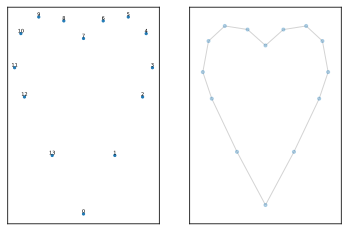

In [17]:
g=nx.Graph()
g.add_nodes_from(list(range(14)))

pos =  {0:(0,-12),
       1:(3.5,-6),2:(6.6,0),3:(7.7,3),4:(7,6.5),
       5:(5,8.2),6:(2.2,7.8),7:(0,6),8:(-2.2,7.8),9:(-5,8.2),10:(-7,6.5), 
    11:(-7.7,3),12:(-6.6,0),13:(-3.5,-6)}

make_connect_the_dots(g,pos, print_path="heart.pdf")

In [ ]:
# TA notes
...

q3 = ... # Out of 4 (graph has position object, looks like it makes
#                    sense with lines, pdf name matches shape, g.nodes is 
#                    a range)

# Question 4. Visualising Animal networks

We will return to the site [Network Repository](https://www.networkrepository.com/) throughout the course. They have a very large number of network data sets ranging in size and scope. In looking through these data sets, I noticed that the animal data sets tended to be relatively small and straightforward. The way the data is stored does vary between datasets but generally it can be imported using `read_edgelist`. 

Find one of the networks with the animal tag [available here](https://networkrepository.com/asn.php). Download, unzip, and visualize it. Virtually all of these networks have an academic paper associated with them. Check out the paper. Find out if there is a claim in the paper that can be signified in the visualisation. This may not be the case. Write about why you think the claim from the paper may or may not be evident from the visualisation of the network. Admittedly, the papers vary in their complexity or relevance to person social networks. Yet, they are still social networks. You may discover some interesting contrasts with human behaviour and perhaps a few similarities.

In [18]:
import requests

In [19]:
# Example importation: This would require you downloading these specific 
# animal networks. These are just for illustration to help you get data in. 
from pathlib import Path 
import networkx as nx 

data_folder = Path().cwd().parent / "data"

# The "data=(...)" parameter is for the third, fourth, etc columns.
# Its tuples of ("name of attribute", value_type)
# Since the bison network had "# of interactions" in third column I had to include that. 
bison_g = nx.read_edgelist(data_folder / 
    "mammalia-bison-dominance/mammalia-bison-dominance.edges", 
                           data=(("num_interact",int),))

print(nx.info(bison_g))
print(bison_g.edges[('1', '2')])
print()

# If it had two extra columns after the from and two edges it would 
# look like: 
# 0 1 5 10
# 0 2 3 15
# 1 2 3 10
# 1 3 5 20
# And you can read that data with with two extra data columns like so:
raccoon_g = nx.read_edgelist(data_folder / 
    "mammalia-raccoon-proximity/mammalia-raccoon-proximity.edges", 
                             data=(("var1",int),("var2",int)))

print(nx.info(raccoon_g))
print(raccoon_g.edges[('1', '2')])


FileNotFoundError: [Errno 2] No such file or directory: '/Users/elmiramansur/Desktop/networks/data/mammalia-bison-dominance/mammalia-bison-dominance.edges'

In [20]:
attr_url = "https://raw.githubusercontent.com/bansallab/asnr/master/Networks/Mammalia/bats_roostuse_weighted/bat_silvis_roosting_attribute.graphml"
req = requests.get(attr_url)

with open("bat_silvis_roosting_attribute.graphml", "w") as f:
    f.write(req.text)

network_data = Path().cwd().parent / "Formatives"
batt = nx.read_graphml(network_data / "bat_silvis_roosting_attribute.graphml")
network_data = Path().cwd().parent / "data"/ "mammalia-bat-roosting-indiana.edges"
nx.read_weighted_edgelist(network_data, nodetype=int)
print(nx.info(batt))


Graph with 43 nodes and 546 edges


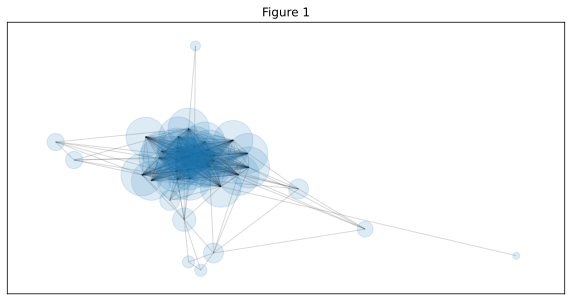

In [30]:
plt.figure(1,figsize=(10,5))
plt.title("Figure 1")
node_sizes = [50*d for n,d in batt.degree()]
nx.draw_networkx(batt, pos=nx.spring_layout(batt),node_size=node_sizes,with_labels=False,alpha=0.15)

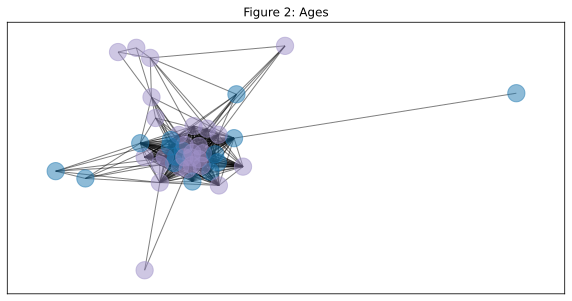

In [31]:
ages= nx.get_node_attributes(batt, 'Age (2009)')
adult_n=[k for k,v in ages.items() if (ages[k]=="adult")]
juv_n= [k for k,v in ages.items() if (ages[k]=="juv")]

colors = ['#1f78b1' if (n in adult_n) else '#9f91c9' for n in batt.nodes]

plt.figure(1,figsize=(10,5))
plt.title("Figure 2: Ages")
nx.draw_networkx(batt, pos=nx.spring_layout(batt,iterations=100),node_color=colors,with_labels=False,alpha=0.5)

Here: Notable finding from the paper that may or may not be evident from the visualisation, explaining why or why not. 

### Findings

1) "We found the colony roosting network was highly centralized"
2) "Social network structure appeared to be unrelated to segregation of roosts between age classes."

Paper: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0096937

(**Note**: I found this part very interesting, so I wanted to think more generally and try out a few things, sorry if this is taking more time than it should take for you. If that's the case, let me know and I'll just keep my ideas for another time, maybe for my summative.)

1) I don't yet know the measures that makes a network centralized, but in Figure 1 above where the node size shows the degree, we can see that the nodes in the middle are considerably larger and have more edges. But there seems to be a lot of nodes in the center, which made me question whether there can be multiple nodes in the core of a centralized network and how different scenerios could affect the asymmetry in the degree sizes. So I tried a few of the possible scenerios below. 
    * From the figures 1 & 2 below, we can see that even with same number of nodes, when more nodes are peripherial rather than central, this increases the difference between the peripheral and central nodes' degrees, which is supposed to correspond to a more central network but the organization structures are actually the same. 
    * Also, the only difference betweeen Figure 3 & 4, where colors indicate whether the node is central or periphral, is that the central nodes are not connected to each other in Figure 3, but they are still connected to every other node so play a very central role. However, the differences between the degrees of central and periphral nodes decreased so much that it makes it impossible to comment on the structure and centrality. 
2) Although I plotted different age groups with different node colors, and did not notice a particular difference in structures among ages, I don't know if this would in any way lead to the second conclusion.

In [33]:
#random edges and positions with center
import random
def rand_cent(node_n,central_n):
    nodes= list(range(node_n))
    cent= random.sample(nodes,central_n)
    edges=[]
    positions={}
    colors={}
    centre=[]
    for i in nodes:
        rest=nodes[:i]+nodes[i+1:]
        if i in cent:
            colors[i]='#9f91c9'
            positions[i]=(random.uniform(-.1,.4),random.uniform(0.540,0.549))
            for j in rest:
                if not (i,j) or not (j,i) in edges:
                    edges.append((i,j))
                if j in cent:
                    if not (i,j) or not (j,i) in centre:
                        centre.append((i,j))
                    
            
        else:
            colors[i]='#1f78b1'
            positions[i]=(random.uniform((-1.2),(.4)),random.uniform((0.560),(0.563)))
            for c in cent:
                if not (i,c) or not (c,i) in edges:
                    edges.append((i,c))                
    

    return cent,centre,colors,positions,edges

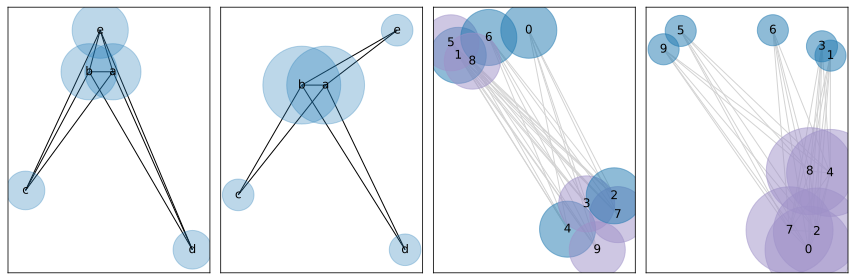

In [34]:
g_pos=nx.Graph()
edgelist = [('a','b'),('b','c'),('a','c'),('d','a'),('d','b'),('e','a'),('e','b'),('e','c'),('e','d')]
g_pos.add_edges_from(edgelist)
pos = { 'a':(.45,0.54),
    'b':(.30,0.54),
    'c':(-.1,0.538),
    'd':(0.95,0.537),
    'e':(0.37,0.5407)}

fig,axs= plt.subplots(1,4, figsize=(12, 4))
normed_degrees = {k:100*(v/sum(list(dict(g_pos.degree()).values()))) for k,v in dict(g_pos.degree()).items()}
node_sizes = [(d**2.6) for n,d in normed_degrees.items()]
#node_sizes = [(d**5.5) for n,d in g_pos.degree()]
nx.draw_networkx_nodes(g_pos,pos,alpha=0.3,node_size=node_sizes,ax=axs[0]) 
nx.draw_networkx_edges(g_pos,pos,ax=axs[0])
nx.draw_networkx_labels(g_pos,pos,ax=axs[0])

g_post=nx.Graph()
edgelist1 = [('a','b'),('b','c'),('a','c'),('d','a'),('d','b'),('e','a'),('e','b')]
g_post.add_edges_from(edgelist1)
pos = {'a':(.45,0.54),
    'b':(.30,0.54),
    'c':(-.1,0.538),
    'd':(0.95,0.537),
    'e':(0.90,0.541)}
normed_degrees = {k:100*(v/sum(list(dict(g_post.degree()).values()))) for k,v in dict(g_post.degree()).items()}
node_sizes = [(d**2.6) for n,d in normed_degrees.items()]
nx.draw_networkx_nodes(g_post,pos,alpha=0.3,node_size=node_sizes,ax=axs[1]) 
nx.draw_networkx_edges(g_post,pos,ax=axs[1])
nx.draw_networkx_labels(g_post,pos,ax=axs[1])

g_post=nx.Graph()
cent,centre,colors,positions,edges=rand_cent(10,5)
color=[v for k,v in colors.items()]

edges = [x for x in edges if x not in centre]
edgelist1 = edges
g_post.add_edges_from(edgelist1)
normed_degrees1 = {k:100*(v/sum(list(dict(g_post.degree()).values()))) for k,v in dict(g_post.degree()).items()}

pos = positions
node_sizes = [(d**3.5) for n,d in normed_degrees1.items()]
nx.draw_networkx_nodes(g_post,pos,alpha=0.5,node_size=node_sizes,ax=axs[2],node_color=color) 
nx.draw_networkx_edges(g_post,pos,ax=axs[2], edge_color = "lightgrey")
nx.draw_networkx_labels(g_post,pos,ax=axs[2])

g_post=nx.Graph()
cent,centre,colors,positions,edges=rand_cent(10,5)
color=[v for k,v in colors.items()]

edgelist1 = edges
g_post.add_edges_from(edgelist1)
normed_degrees1 = {k:100*(v/sum(list(dict(g_post.degree()).values()))) for k,v in dict(g_post.degree()).items()}

pos = positions
node_sizes = [(d**3.5) for n,d in normed_degrees1.items()]
nx.draw_networkx_nodes(g_post,pos,alpha=0.5,node_size=node_sizes,ax=axs[3],node_color=color) 
nx.draw_networkx_edges(g_post,pos,ax=axs[3], edge_color = "lightgrey")
nx.draw_networkx_labels(g_post,pos,ax=axs[3])
plt.tight_layout()


In [ ]:
# TA notes below 


q4 = ... # out of 12 (load network + wrangle into data object + visualise
#                     network with spring embedder + consider aethetic 
#                     components/iterations/node size/node color +
#                     explanation from paper/website )  